<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/02_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Bar plot**

In [2]:
# 1. Import data
data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")

In [3]:
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [4]:
# 2. Examine the structure of the data
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [ ]:
## Check the number of columns and rows
dim(data)

[1] 1000    8

In [ ]:
## Show the first 6 rows of the dataset
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [ ]:
## Check for NA values
table(is.na(data))


FALSE 
 8000 

In [ ]:
## Remove rows with NA values, if any exist
data <- data[rowSums(is.na(data)) == 0, ]

## Remove columns with NA values, if any exist (This can be potentially dangerous, I commented it out. Uncomment only if necessary.)
# data <- data[, colSums(is.na(data)) == 0]

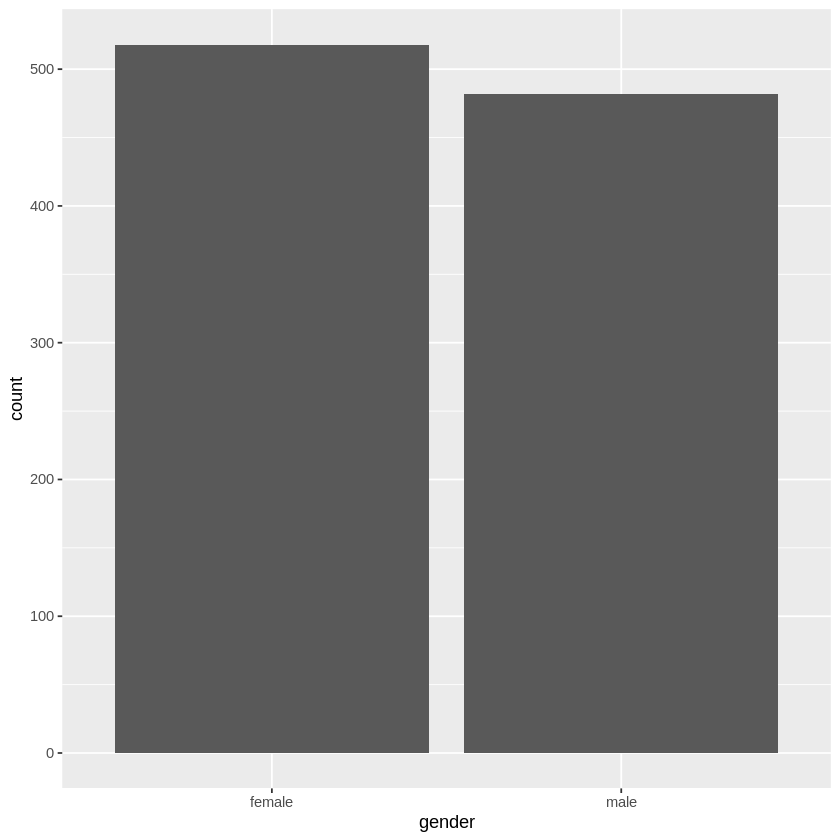

In [ ]:
# 3. Visualization
## Load required library
library(ggplot2)

## Basic ggplot2 barplot
ggplot(data, aes(x = gender)) +
    geom_bar()

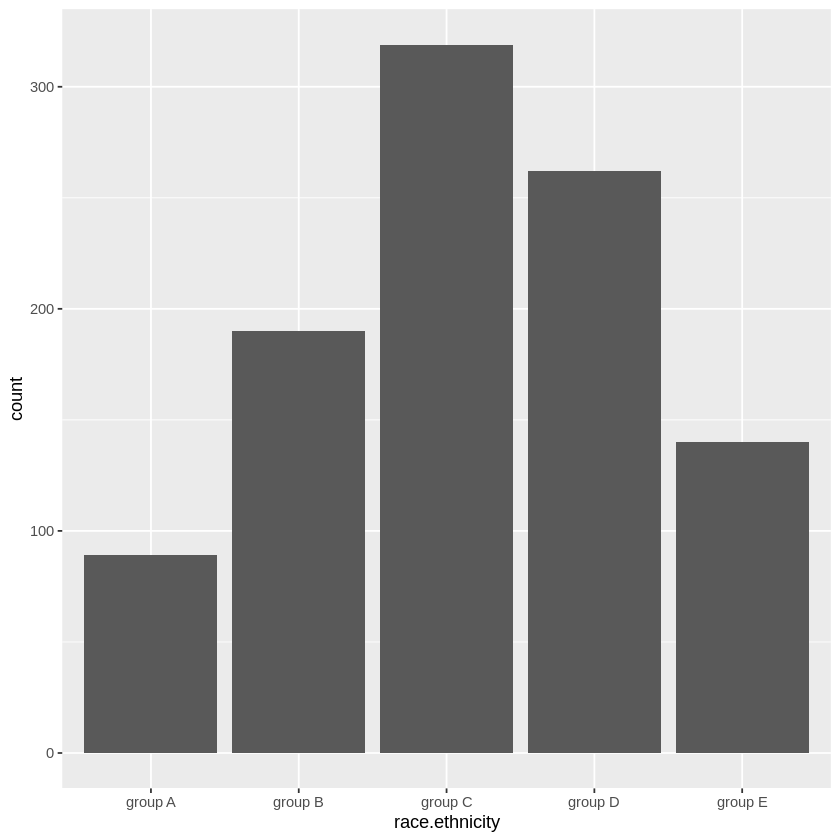

In [ ]:
ggplot(data, aes(x = race.ethnicity)) +
    geom_bar()

# **2. Coloring the bar plot**

In [11]:
# 1. Import data
## Load required library
library(ggplot2)

data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [12]:
# 2. Create a data frame with the count of genders
data_new <- data.frame(table(data$gender))
colnames(data_new) <- c("gender", "freq") # Rename the columns
head(data_new)

,gender,freq
,<fct>,<int>
1,female,518
2,male,482


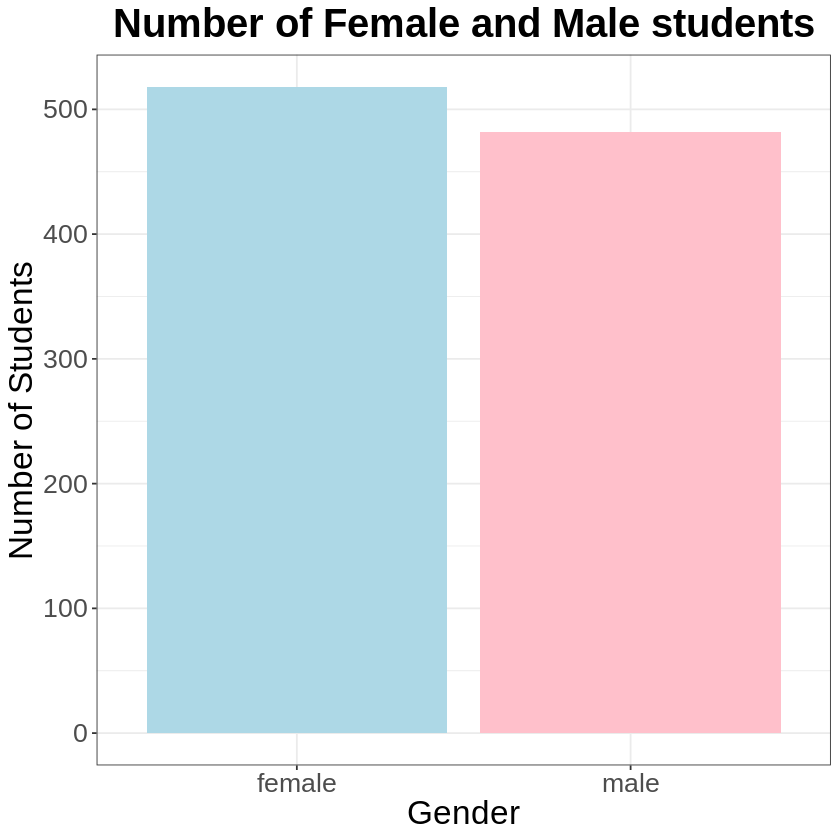

In [14]:
# 3.Improved barplot design 1
ggplot(data_new, aes(x = gender, y = freq, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") + # remove legend
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
    scale_fill_manual(values = c("lightblue", "pink")) # Custom colors

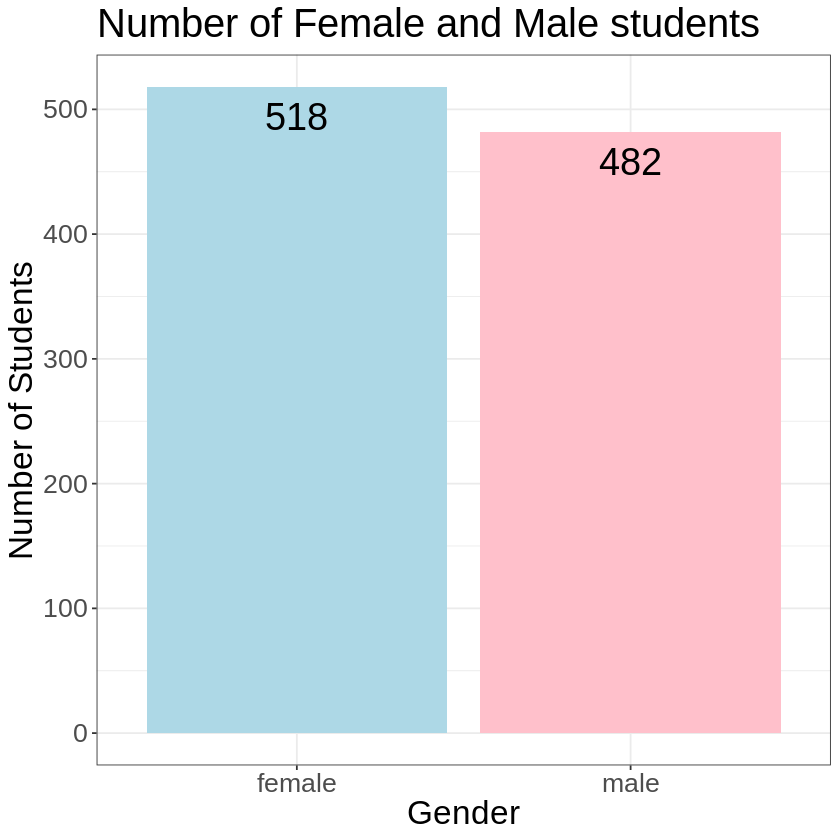

In [16]:
# 4. Improved barplot design 2
ggplot(data_new, aes(x = gender, y = freq, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    geom_text(aes(label = freq), vjust = 1.6, color = "black", size = 8) +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") +
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    scale_fill_manual(values = c("lightblue", "pink"))

# **3. Bar plot with grouped data**

In [18]:
# 1. Import data
## Load required library
library(ggplot2)

data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [20]:
# 2. Create grouped data
data_new_2 <- data.frame(table(data$gender, data$test.preparation.course))
colnames(data_new_2) <- c("gender", "test.preparation.course", "freq")
head(data_new_2)

,gender,test.preparation.course,freq
,<fct>,<fct>,<int>
1,female,completed,184
2,male,completed,174
3,female,none,334
4,male,none,308


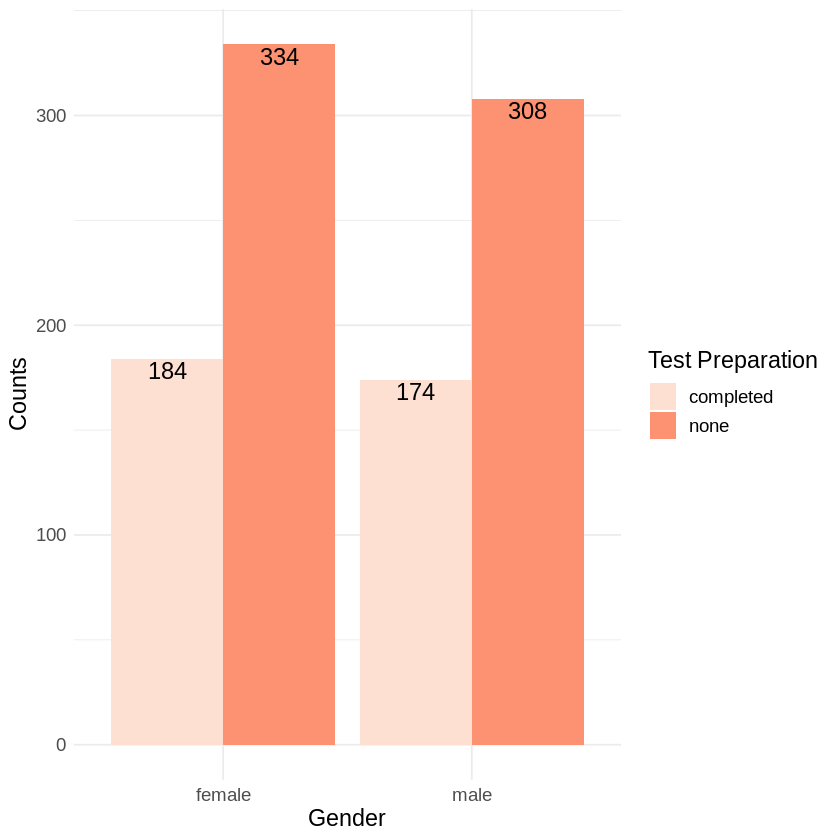

In [21]:
# 3. Create grouped barplots
ggplot(data_new_2, aes(x = gender, y = freq, fill = test.preparation.course)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = freq),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(fill = "Test Preparation", y = "Counts", x = "Gender") +
    scale_fill_brewer(palette = "Reds")

# **4. Table plot**

In [22]:
# 1. Import data
## Load required library
library(ggplot2)

data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


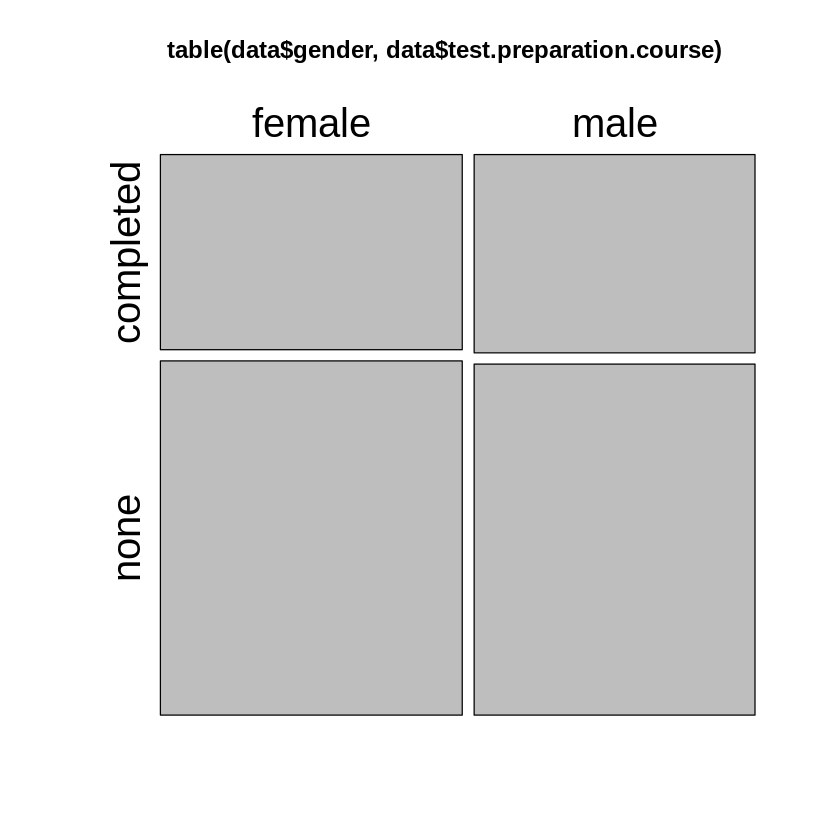

In [23]:
# 2. Create table plot with Mosaicplot
mosaicplot(table(data$gender, data$test.preparation.course), cex = 2)

In [25]:
?mosaicplot

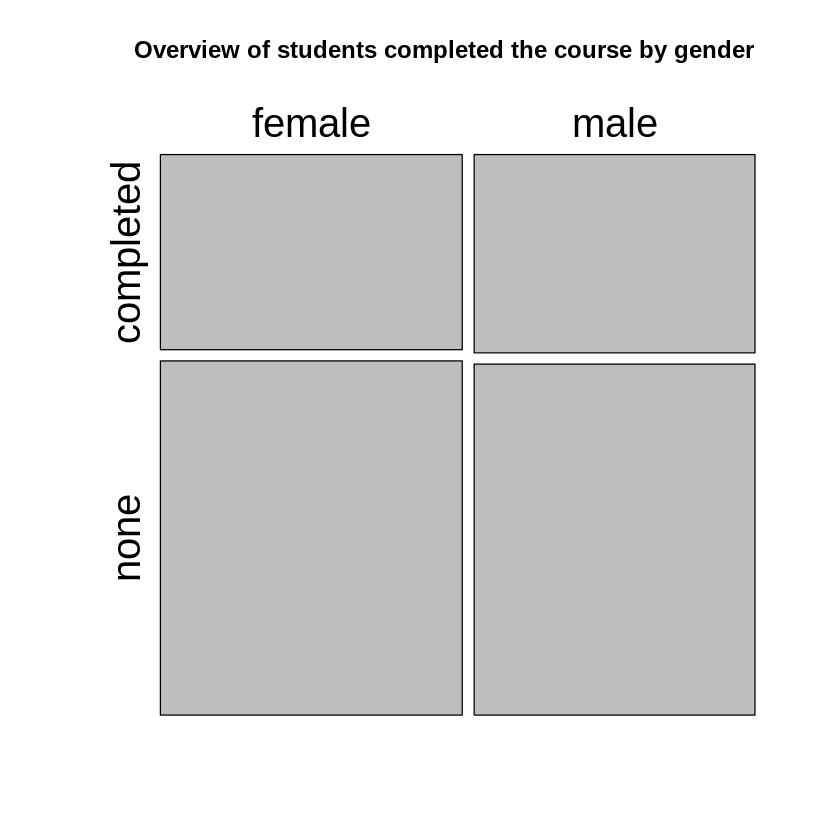

In [27]:
# 3. Create table plot with Mosaicplot with nice title
mosaicplot(table(data$gender, data$test.preparation.course), main = "Overview of students completed the course by gender", cex = 2)